In [1]:
import torch
from torch.utils.data import DataLoader

from torchvision.transforms import v2

import albumentations as A
from albumentations.pytorch import ToTensorV2

from tqdm.notebook import tqdm

%load_ext autoreload
%autoreload 2
from utils.Preprocessing import WhiteTopHat , CLAHE
from utils.dataset import  UnetDataset
from models.nnunet import nnUnet
from utils.losses import UnetLoss
from utils.recorder import HistoryRecorder
from utils.logger import save_full_report
from trainer import trainer

# Training

In [ ]:
args = {
    "base_path" : "../arcade/nnUnet_dataset/syntax",
    "in_c" : 1,
    "base_channel" :32,
    "image_shape" : (512,512),
    "class_count" : 26 ,
    "attention" : True,
    "batch_size" : 10,
    "num_workers" : 10,
    "device" : "cuda" if torch.cuda.is_available() else "cpu",
    "lr" : 0.001,
    "momentum" : 0.9,
    "epcohs":30,
    "f_int_scale" : 2,
    "full_report_cycle" : 10,
    "max_channels":512,
    "input_channels":1,
    "output_base_path" : "./outputs",
    "name" : "Attention7-512caped"
}
class_map = {
    0: '1',1: '2', 2: '3',3: '4',
    4: '5',5: '6',6: '7',7: '8',
    8: '9',9: '9a',10: '10',11: '10a',
    12: '11',13: '12',14: '12a',15: '13',
    16: '14',17: '14a',18: '15',19: '16',
    20: '16a',21: '16b',22: '16c',
    23: '12b',24: '14b'
}

In [3]:
train_transforms = A.Compose([
    ToTensorV2()
])
test_transforms = A.Compose([
    ToTensorV2()
])

# train_preprocess = v2.Compose([
#     WhiteTopHat(kernel_size=(50,50)),
#     CLAHE()
    
# ])
train_preprocess = None
train_ds = UnetDataset(args = args,transform = train_transforms,preprocessor =train_preprocess ,part = "train")
valid_ds = UnetDataset(args = args,transform = test_transforms,preprocessor =train_preprocess,part = "val")

train_loader = DataLoader(
    train_ds,
    batch_size = args["batch_size"] ,
    num_workers = args["num_workers"] ,
    pin_memory=True,
    shuffle=True
)
valid_loader = DataLoader(
    valid_ds,
    batch_size = args["batch_size"] ,
    num_workers = args["num_workers"] ,
    pin_memory=True,
    shuffle=False,
)

NOTE : preprocessor is not defined . no preprocessing will be used !


  0%|          | 0/1000 [00:00<?, ?it/s]

NOTE : preprocessor is not defined . no preprocessing will be used !


  0%|          | 0/200 [00:00<?, ?it/s]

In [4]:
model = nnUnet(args).to(args["device"])
loss_fn = UnetLoss(args)
optimizer = torch.optim.Adam(model.parameters(), lr=args["lr"])
recorder = HistoryRecorder(class_maps =class_map)
trainer(args,recorder,model,optimizer,loss_fn,train_loader,valid_loader)

number of layers : 7
encoder settings :  [32, 64, 128, 256, 512, 512, 512]
bottle-neck settings :  1024
decoder settings :  [1024, 1024, 512, 256, 128, 64]
head settings :  26


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

train ==> epcoh (0) | loss : 2.847179341316223 
dice loss : -0.010861273678019643 - bce loss : 2.8580406141281127 
train avg dice epoch 0 : 0.0018237947503257602
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
valid ==> epcoh (0) | loss : 2.5977380752563475 
dice loss : -0.010210363287478685 - bce loss : 2.607948434352875 
valid avg dice epoch 0 : 0.00037564673193177836
------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

train ==> epcoh (1) | loss : 2.4894528555870057 
dice loss : -0.010914059309288859 - bce loss : 2.50036691904068 
train avg dice epoch 1 : 0.00035441916691479505
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
valid ==> epcoh (1) | loss : 2.3765414476394655 
dice loss : -0.010266948770731688 - bce loss : 2.3868084073066713 
valid avg dice epoch 1 : 7.714500178607175e-05
------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

train ==> epcoh (2) | loss : 2.279829452037811 
dice loss : -0.011199688138440252 - bce loss : 2.291029131412506 
train avg dice epoch 2 : 0.00015230356404073963
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
valid ==> epcoh (2) | loss : 2.1807721495628356 
dice loss : -0.010543237579986453 - bce loss : 2.191315400600433 
valid avg dice epoch 2 : 5.74257117373291e-05
------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

train ==> epcoh (3) | loss : 2.0858670043945313 
dice loss : -0.011535448767244817 - bce loss : 2.0974024415016173 
train avg dice epoch 3 : 0.00018827610090250795
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
valid ==> epcoh (3) | loss : 1.9903568208217621 
dice loss : -0.010852785594761372 - bce loss : 2.001209610700607 
valid avg dice epoch 3 : 7.777472350671844e-05
------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

train ==> epcoh (4) | loss : 1.8921714067459106 
dice loss : -0.011919666035100817 - bce loss : 1.9040910768508912 
train avg dice epoch 4 : 3.421548194519245e-05
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
valid ==> epcoh (4) | loss : 1.7979419112205506 
dice loss : -0.011165422247722745 - bce loss : 1.8091073334217072 
valid avg dice epoch 4 : 3.5011130695763315e-06
------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

train ==> epcoh (5) | loss : 1.7041728818416595 
dice loss : -0.01231231652200222 - bce loss : 1.716485196352005 
train avg dice epoch 5 : 5.874595204782323e-06
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
valid ==> epcoh (5) | loss : 1.6153666496276855 
dice loss : -0.011639554519206285 - bce loss : 1.627006208896637 
valid avg dice epoch 5 : 4.968327538656886e-06
------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

train ==> epcoh (6) | loss : 1.523504455089569 
dice loss : -0.01284851505421102 - bce loss : 1.536352972984314 
train avg dice epoch 6 : 6.352586581610964e-06
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
valid ==> epcoh (6) | loss : 1.4407801032066345 
dice loss : -0.011996025312691927 - bce loss : 1.4527761518955231 
valid avg dice epoch 6 : 9.034498917793597e-07
------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

train ==> epcoh (7) | loss : 1.3528492081165313 
dice loss : -0.013390903295949101 - bce loss : 1.366240110397339 
train avg dice epoch 7 : 3.210158158201388e-06
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
valid ==> epcoh (7) | loss : 1.2766490995883941 
dice loss : -0.012620728183537721 - bce loss : 1.2892698287963866 
valid avg dice epoch 7 : 3.1094530826014128e-06
------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

train ==> epcoh (8) | loss : 1.1899287140369414 
dice loss : -0.014079636121168733 - bce loss : 1.2040083503723145 
train avg dice epoch 8 : 0.0001655925899182461
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
valid ==> epcoh (8) | loss : 1.109965878725052 
dice loss : -0.013397044129669666 - bce loss : 1.123362910747528 
valid avg dice epoch 8 : 0.0053388071064375976
------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

train ==> epcoh (9) | loss : 1.0262556344270706 
dice loss : -0.015191836273297668 - bce loss : 1.0414474749565124 
train avg dice epoch 9 : 0.007246127287371102
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
valid ==> epcoh (9) | loss : 0.9577691465616226 
dice loss : -0.01492699133232236 - bce loss : 0.9726961344480515 
valid avg dice epoch 9 : 0.006956797242584142
1 => 7.774477676220082e-14
2 => 7.01734677310828e-14
3 => 8.167799119343511e-14
4 => 1.1434713039718686e-13
5 => 6.129479383906386e-14
6 => 0.1739199310541153
7 => 6.751465163844228e-14
8 => 7.955829463106301e-14
9 => 1.0648606833547208e-13
9a => 2.7465735848858364e-13
10 => 5.384739420848106e-13
10a => 2.6413101306826947e-12
11 => 9.961846072440578e-14
12 => 2.814522974490391e-13
12a => 1.3709333961022668e-13
13 => 9.073833671198114e-14
14 => 2.4090579249340383e-13
14a => 2.437597378720374e-13
15 => 2.705627605639749e-12
16 => 1.215539442104424e-13
16a => 7.55344029511329e-13
16b => 4.744958224077445e-13
16c

  0%|          | 0/100 [00:00<?, ?it/s]

train ==> epcoh (10) | loss : 0.879718866944313 
dice loss : -0.02188877059146762 - bce loss : 0.9016076368093491 
train avg dice epoch 10 : 0.014059643000808888
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
valid ==> epcoh (10) | loss : 0.8160292059183121 
dice loss : -0.027490291092544795 - bce loss : 0.8435194939374924 
valid avg dice epoch 10 : 0.013843951048743286
------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

train ==> epcoh (11) | loss : 0.7444603830575943 
dice loss : -0.03432016322389245 - bce loss : 0.7787805473804474 
train avg dice epoch 11 : 0.021766827404943644
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
valid ==> epcoh (11) | loss : 0.6907364547252655 
dice loss : -0.03546884786337614 - bce loss : 0.7262053102254867 
valid avg dice epoch 11 : 0.02711067199748413
------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

train ==> epcoh (12) | loss : 0.6272470360994339 
dice loss : -0.04093121632933617 - bce loss : 0.6681782513856888 
train avg dice epoch 12 : 0.026554105282274424
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
valid ==> epcoh (12) | loss : 0.5854740530252457 
dice loss : -0.03860131222754717 - bce loss : 0.6240753710269928 
valid avg dice epoch 12 : 0.035747946501192014
------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

train ==> epcoh (13) | loss : 0.5206712380051612 
dice loss : -0.055679591074585914 - bce loss : 0.5763508325815201 
train avg dice epoch 13 : 0.045849325185847396
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
valid ==> epcoh (13) | loss : 0.4799558654427528 
dice loss : -0.06547937355935574 - bce loss : 0.5454352378845215 
valid avg dice epoch 13 : 0.04938176868552623
------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

train ==> epcoh (14) | loss : 0.4157070896029472 
dice loss : -0.08198737163096666 - bce loss : 0.4976944628357887 
train avg dice epoch 14 : 0.06050207811917274
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
valid ==> epcoh (14) | loss : 0.3872735172510147 
dice loss : -0.08337576389312744 - bce loss : 0.47064928263425826 
valid avg dice epoch 14 : 0.07283894944320662
------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

train ==> epcoh (15) | loss : 0.32616069823503496 
dice loss : -0.1030521547049284 - bce loss : 0.4292128536105156 
train avg dice epoch 15 : 0.08249028271653726
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
valid ==> epcoh (15) | loss : 0.30580405443906783 
dice loss : -0.10350078567862511 - bce loss : 0.40930483788251876 
valid avg dice epoch 15 : 0.08746803007129036
------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

train ==> epcoh (16) | loss : 0.24314595595002175 
dice loss : -0.13308448918163776 - bce loss : 0.3762304443120956 
train avg dice epoch 16 : 0.10432610097079457
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
valid ==> epcoh (16) | loss : 0.22245735302567482 
dice loss : -0.13834893256425856 - bce loss : 0.36080628633499146 
valid avg dice epoch 16 : 0.11712845382320808
------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

train ==> epcoh (17) | loss : 0.14118832528591155 
dice loss : -0.18721126198768615 - bce loss : 0.3283995872735977 
train avg dice epoch 17 : 0.13428864340342095
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
valid ==> epcoh (17) | loss : 0.13517117649316787 
dice loss : -0.18202351331710814 - bce loss : 0.31719468981027604 
valid avg dice epoch 17 : 0.15202903781126367
------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

train ==> epcoh (18) | loss : 0.038338183611631396 
dice loss : -0.246067366451025 - bce loss : 0.2844055500626564 
train avg dice epoch 18 : 0.1778920105044413
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
valid ==> epcoh (18) | loss : 0.04969315305352211 
dice loss : -0.22737965807318689 - bce loss : 0.277072811126709 
valid avg dice epoch 18 : 0.2043345920757096
------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

train ==> epcoh (19) | loss : -0.05783818274736405 
dice loss : -0.3099641786515713 - bce loss : 0.25212599590420726 
train avg dice epoch 19 : 0.2610975428113027
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
valid ==> epcoh (19) | loss : -0.0437359057366848 
dice loss : -0.29682688042521477 - bce loss : 0.25309097468853 
valid avg dice epoch 19 : 0.2574614238742907
1 => 0.7514707446098328
2 => 0.6691932678222656
3 => 0.7067914605140686
4 => 0.582030713558197
5 => 0.7747926712036133
6 => 0.6561852693557739
7 => 0.6022560596466064
8 => 0.5538749694824219
9 => 1.0626201795652795e-13
9a => 2.7465735848858364e-13
10 => 5.377789684922474e-13
10a => 2.6378263722620643e-12
11 => 0.7292036414146423
12 => 2.8132560842518417e-13
12a => 1.3709333961022668e-13
13 => 0.4107367992401123
14 => 2.4090579249340383e-13
14a => 2.4106259523259954e-13
15 => 2.705627605639749e-12
16 => 1.215539442104424e-13
16a => 7.55344029511329e-13
16b => 4.727685257166492e-13
16c => 7.055171334299781e-13


  0%|          | 0/100 [00:00<?, ?it/s]

train ==> epcoh (20) | loss : -0.16931229934096337 
dice loss : -0.387031771838665 - bce loss : 0.21771947294473648 
train avg dice epoch 20 : 0.28067461013831796
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
valid ==> epcoh (20) | loss : -0.14309903457760811 
dice loss : -0.35700668543577196 - bce loss : 0.21390765011310578 
valid avg dice epoch 20 : 0.2780536007885058
------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

train ==> epcoh (21) | loss : -0.25972162634134294 
dice loss : -0.44361274033784864 - bce loss : 0.18389111384749413 
train avg dice epoch 21 : 0.2991354647281428
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
valid ==> epcoh (21) | loss : -0.18962988629937172 
dice loss : -0.37912426739931104 - bce loss : 0.18949438109993935 
valid avg dice epoch 21 : 0.28681190907993576
------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

train ==> epcoh (22) | loss : -0.31250638619065285 
dice loss : -0.4743606844544411 - bce loss : 0.16185429751873015 
train avg dice epoch 22 : 0.3115610106264596
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
valid ==> epcoh (22) | loss : -0.23459525182843208 
dice loss : -0.40357152074575425 - bce loss : 0.1689762704074383 
valid avg dice epoch 22 : 0.2934293326438793
------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

train ==> epcoh (23) | loss : -0.370772325694561 
dice loss : -0.5138483852148056 - bce loss : 0.14307605899870396 
train avg dice epoch 23 : 0.3421924996380404
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
valid ==> epcoh (23) | loss : -0.288909487426281 
dice loss : -0.4429156556725502 - bce loss : 0.1540061667561531 
valid avg dice epoch 23 : 0.3262134671215036
------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

train ==> epcoh (24) | loss : -0.42990157902240755 
dice loss : -0.556227614581585 - bce loss : 0.12632603481411933 
train avg dice epoch 24 : 0.3556231510643561
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
valid ==> epcoh (24) | loss : -0.3227167628705502 
dice loss : -0.4641511529684067 - bce loss : 0.14143438786268234 
valid avg dice epoch 24 : 0.33110061645545746
------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

train ==> epcoh (25) | loss : -0.44163166552782057 
dice loss : -0.5616735336184502 - bce loss : 0.12004186622798443 
train avg dice epoch 25 : 0.35514133195668934
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
valid ==> epcoh (25) | loss : -0.3400038093328476 
dice loss : -0.4773068755865097 - bce loss : 0.13730306252837182 
valid avg dice epoch 25 : 0.34073057624664765
------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

train ==> epcoh (26) | loss : -0.49671853601932525 
dice loss : -0.6034381046891213 - bce loss : 0.10671956852078437 
train avg dice epoch 26 : 0.37901339627845454
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
valid ==> epcoh (26) | loss : -0.3693831980228424 
dice loss : -0.49872870445251466 - bce loss : 0.12934550680220128 
valid avg dice epoch 26 : 0.34731528520621036
------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

train ==> epcoh (27) | loss : -0.5322471734881401 
dice loss : -0.6299291861057281 - bce loss : 0.09768201380968095 
train avg dice epoch 27 : 0.3923833215241002
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
valid ==> epcoh (27) | loss : -0.39990248531103134 
dice loss : -0.5182571172714233 - bce loss : 0.11835463121533393 
valid avg dice epoch 27 : 0.3567718324068902
------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

train ==> epcoh (28) | loss : -0.5543225690722465 
dice loss : -0.645292022228241 - bce loss : 0.09096945248544216 
train avg dice epoch 28 : 0.4016655588154363
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
valid ==> epcoh (28) | loss : -0.40755602717399597 
dice loss : -0.5252465337514878 - bce loss : 0.11769050545990467 
valid avg dice epoch 28 : 0.36621409058607796
------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

train ==> epcoh (29) | loss : -0.580786544084549 
dice loss : -0.6658851957321167 - bce loss : 0.08509865421801806 
train avg dice epoch 29 : 0.41033009692807837
<=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=><=>
valid ==> epcoh (29) | loss : -0.4146628946065903 
dice loss : -0.5295141562819481 - bce loss : 0.11485125832259654 
valid avg dice epoch 29 : 0.3641052150730012
1 => 0.8041676878929138
2 => 0.6959782242774963
3 => 0.7589718103408813
4 => 0.6858698129653931
5 => 0.8017204999923706
6 => 0.7320863604545593
7 => 0.676074743270874
8 => 0.6916540265083313
9 => 0.4261142909526825
9a => 2.7465735848858364e-13
10 => 5.384739420848106e-13
10a => 2.6413101306826947e-12
11 => 0.7998806834220886
12 => 2.814522974490391e-13
12a => 0.3662119209766388
13 => 0.6340867877006531
14 => 2.4090579249340383e-13
14a => 2.437597378720374e-13
15 => 2.705627605639749e-12
16 => 0.7012113332748413
16a => 7.55344029511329e-13
16b => 4.744958224077445e-13
16c => 7.055171334299781e-13
12b => 3.725

Saving Memory
Saving All Plots
Saving Examples


  0%|          | 0/18 [00:00<?, ?it/s]

Saving Verbal Results
Copying Notebook To Results


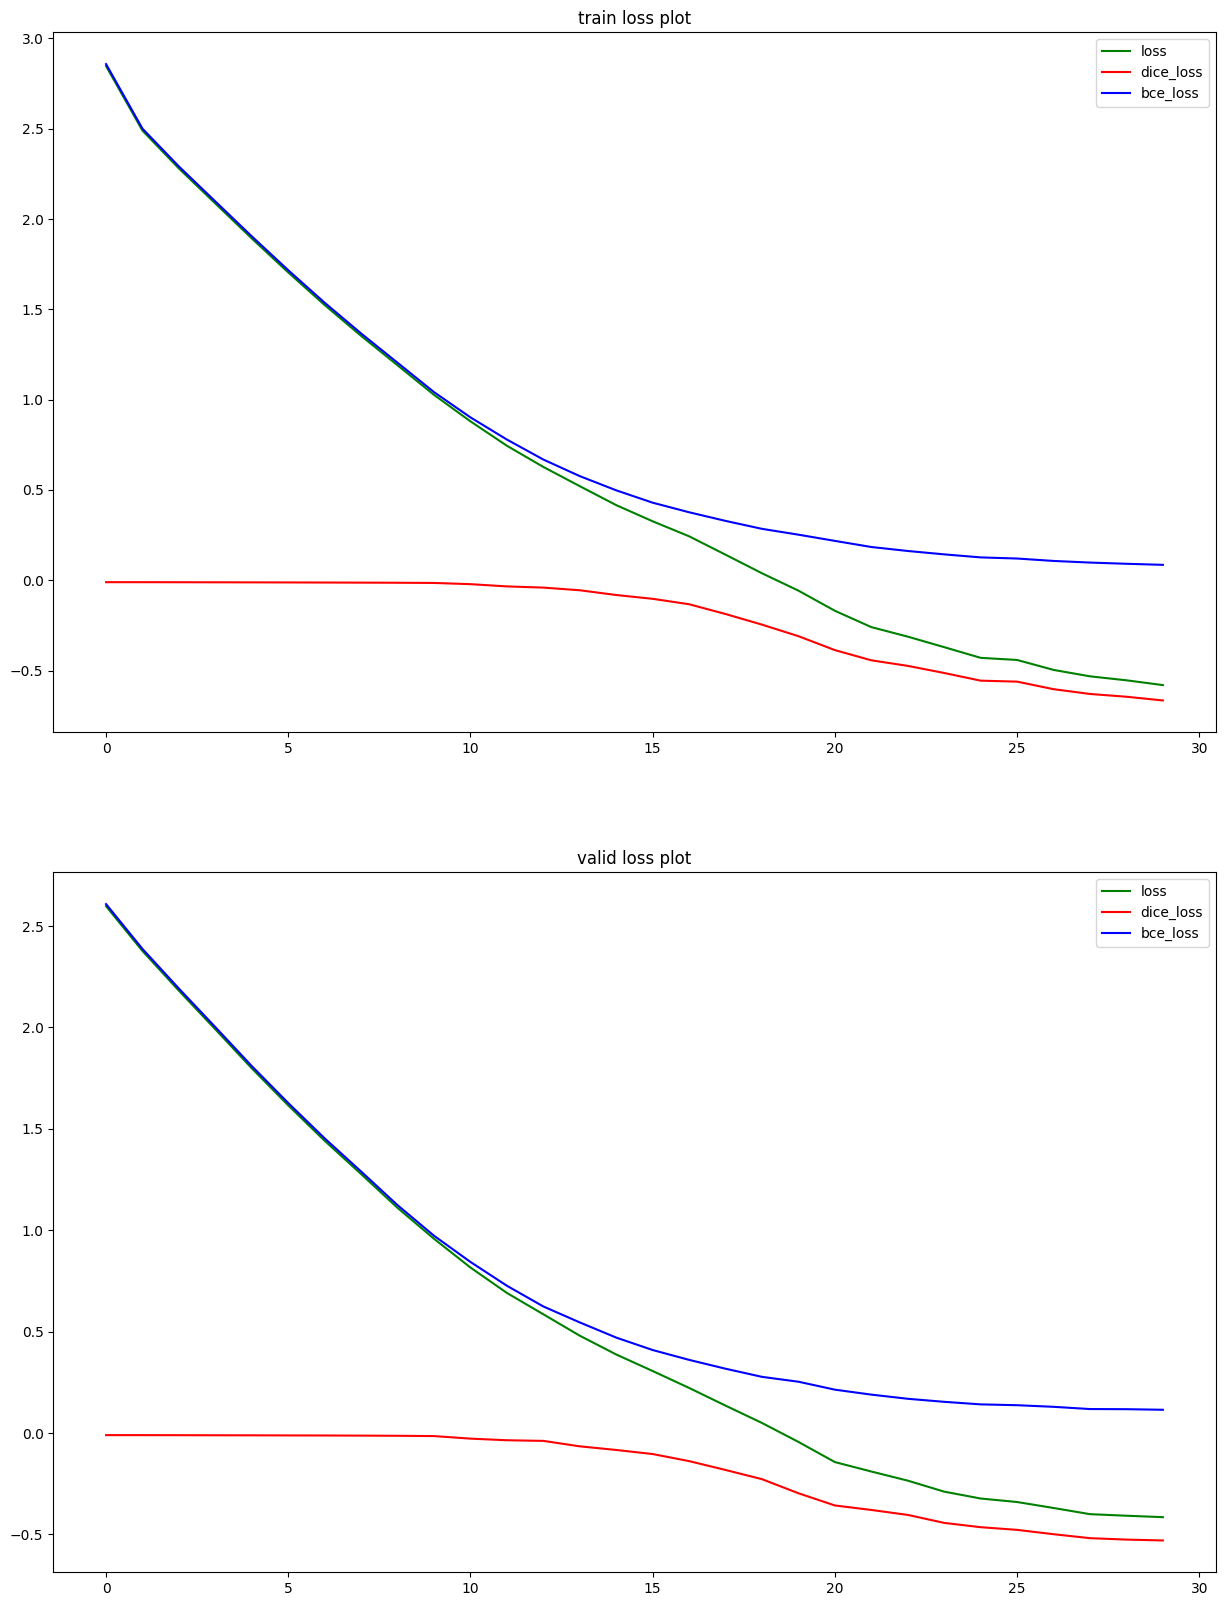

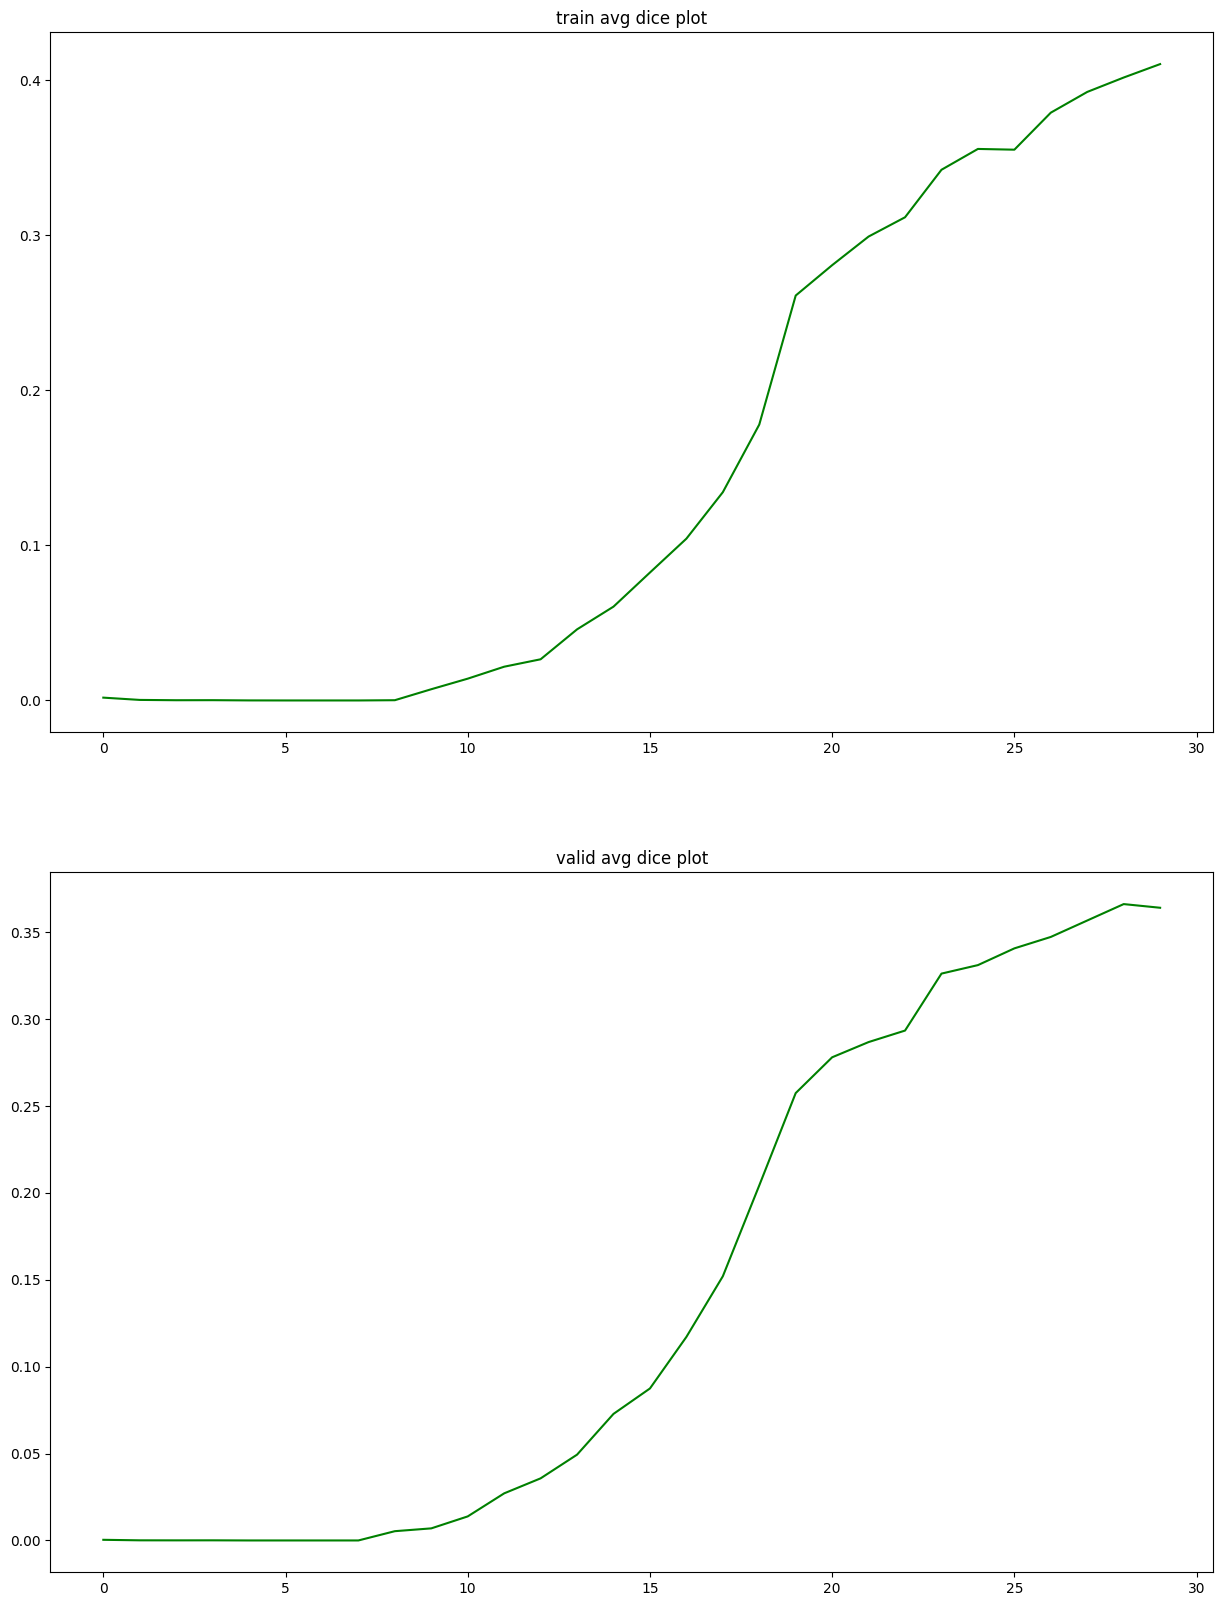

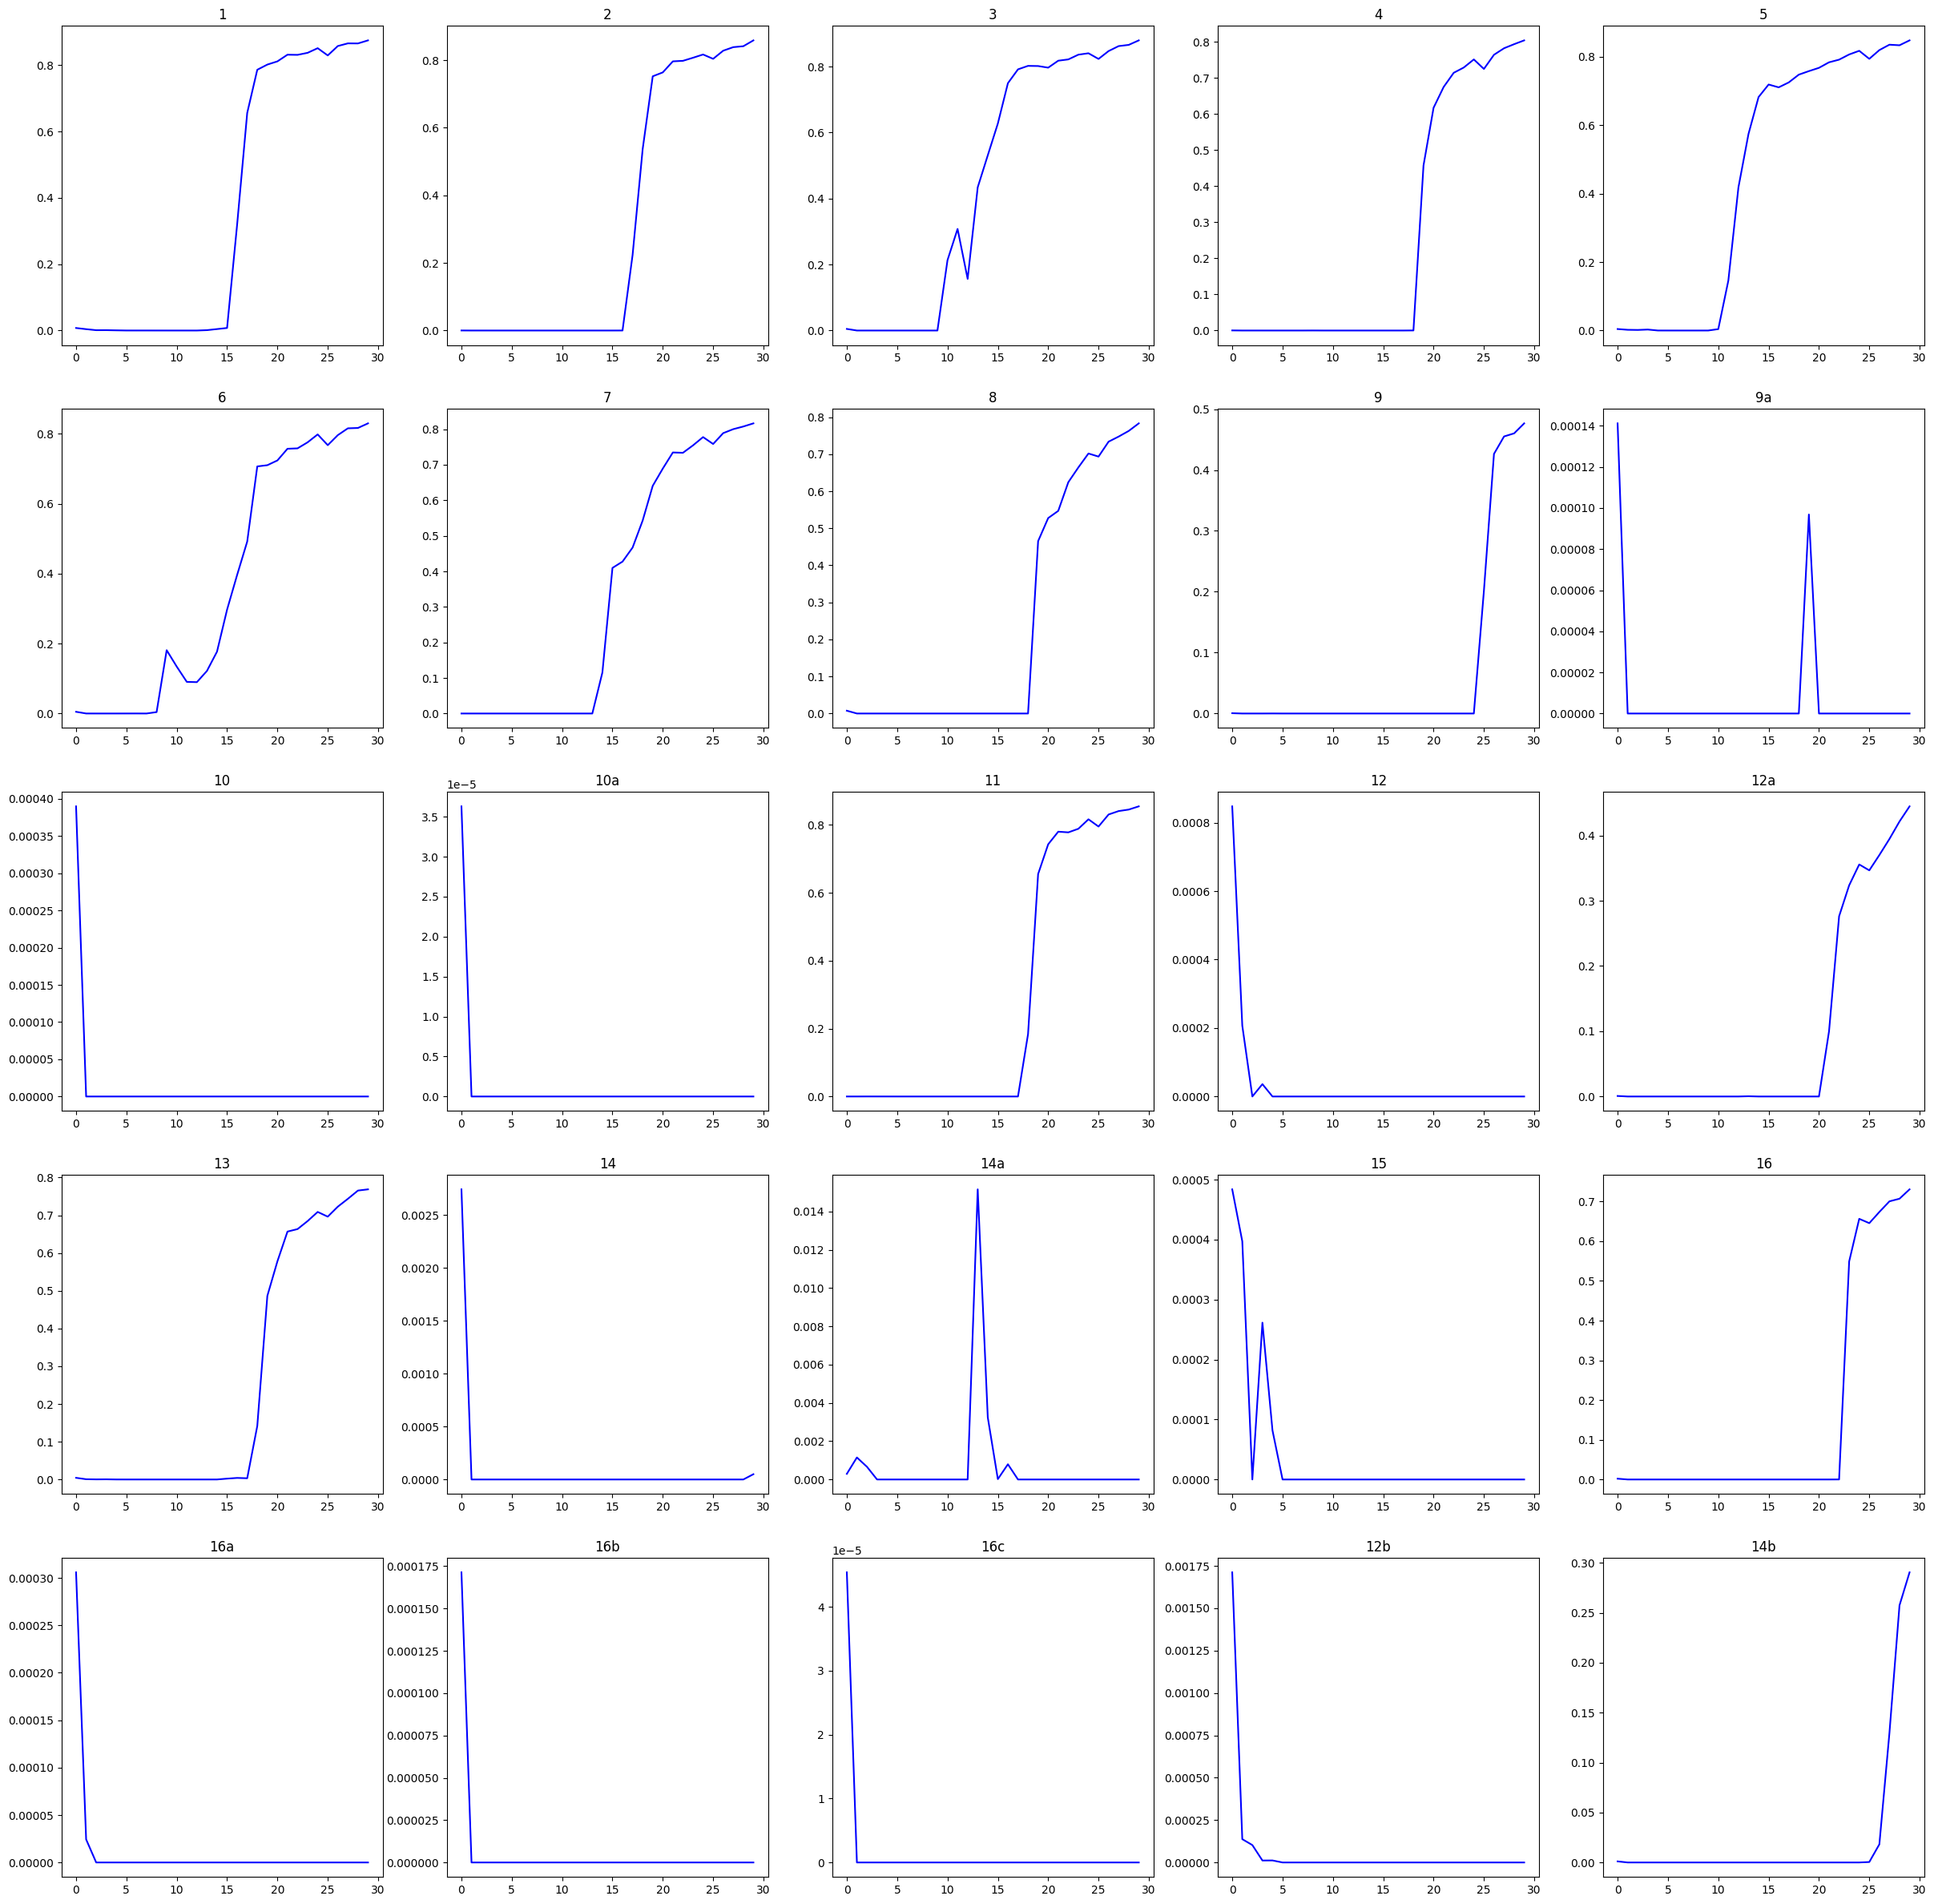

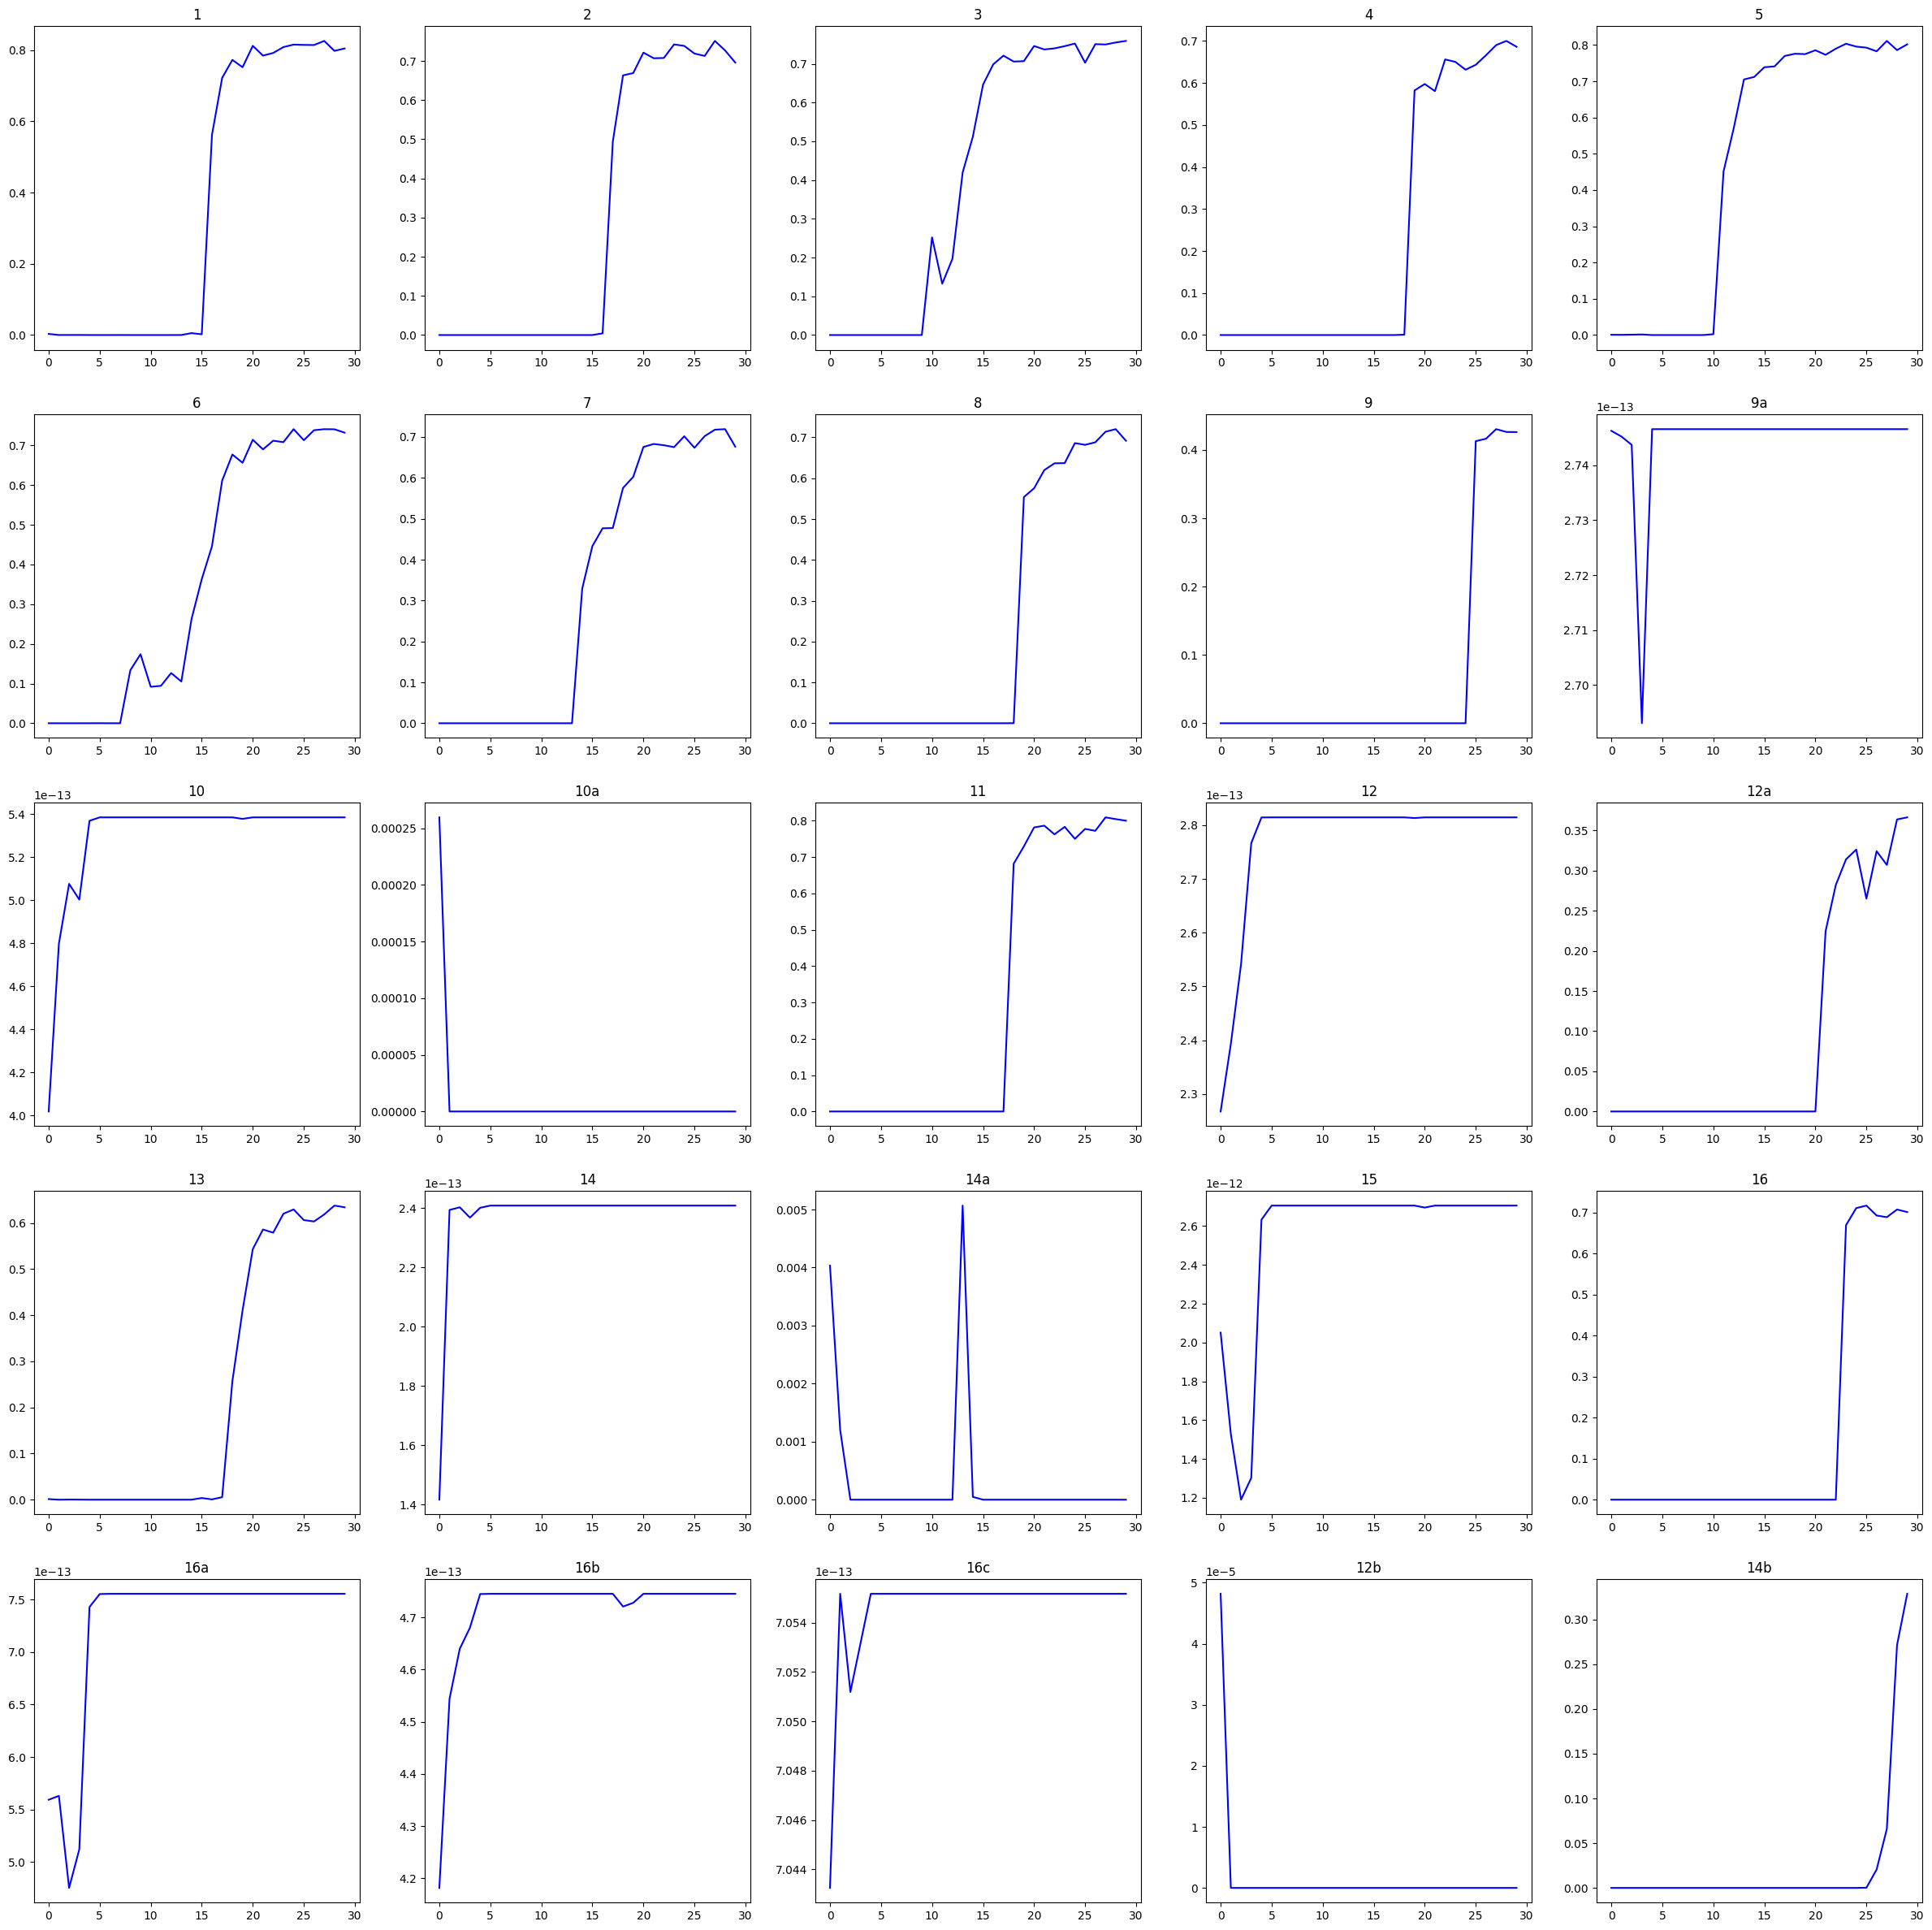

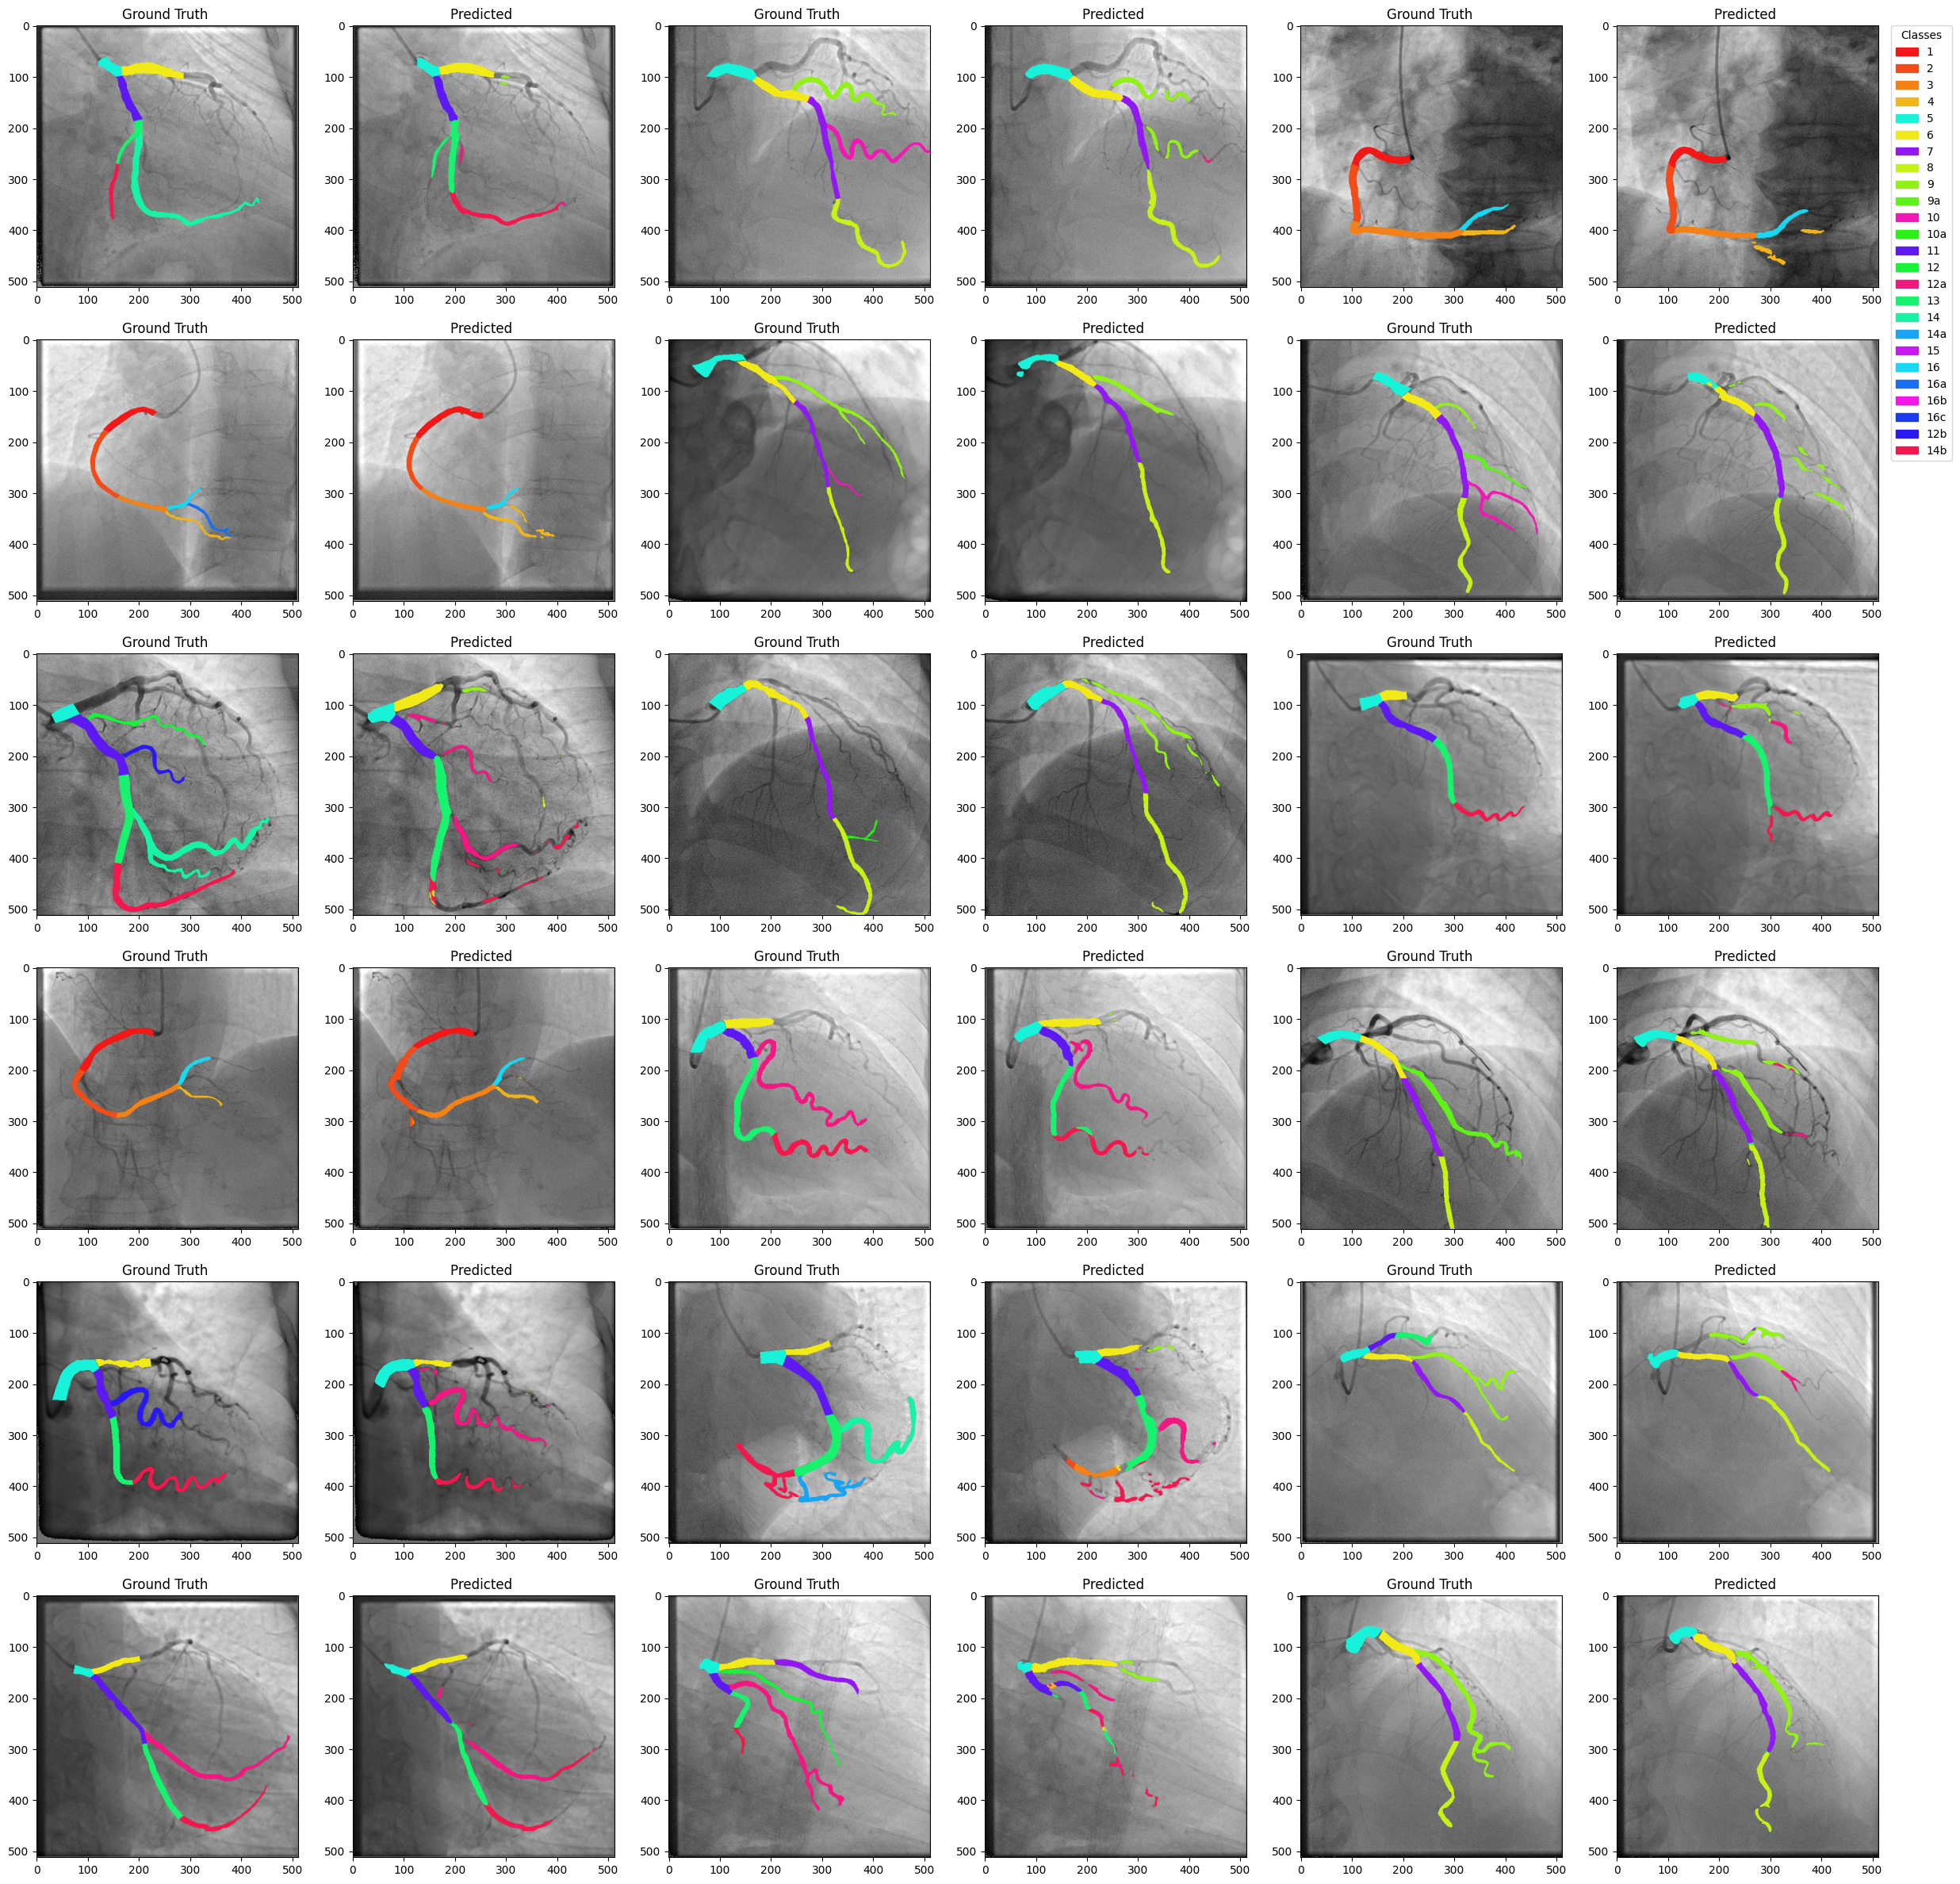

In [5]:
save_full_report(
    recorder= recorder , 
    output_base_path=args["output_base_path"],
    model=model,
    valid_loader=valid_loader,
    args=args,
    class_map=class_map,
    name=args["name"]
)